2. #### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NAN values

When should it be used?

It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
# create a function which would take input as our dataset, feature name and how we want to handle the missing value like 
# mean, median or mode.
def impute_nan(df, variable, median):
    df[variable +"_median"] = df[variable].fillna(median)
    df[variable +"_random"] = df[variable]
    # it will have the random sample to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable +'_random'] = random_sample

In [8]:
median = df.Age.median()

In [9]:
median

28.0

In [10]:
impute_nan(df, 'Age', median)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

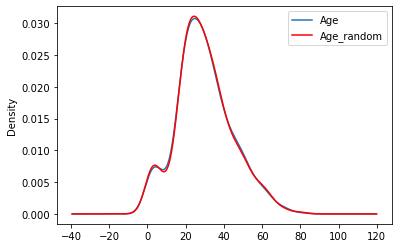

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
#df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
df['Age_random'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

##### Advantages
1. Easy to implement
2. There is less distortion in Variance

##### Disadvantages
1. Every situation randomness won't work

3. #### Capturing NAN values with a new feature

It works well if the data is not missing completely at random

In [19]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(), 1,0)

In [22]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [23]:
df.Age.mean()

29.69911764705882

In [24]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [25]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advanatges
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating additional features(Curse of Dimensionality)

4. #### End of Distribution imputation

On occasions, one has reasons to suspect that missing values are not missing at random. And if the value is missing, there has to be a reason for it. Therefore, we would like to capture this information.

Adding an additional variable indicating missingness may help with this task (as we discussed in the previous lecture). However, the values are still missing in the original variable, and they need to be replaced if we plan to use the variable in machine learning.

Sometimes, we may also not want to increase the feature space by adding a variable to capture missingness.

So what can we do instead?

We can replace the NA, by values that are at the far end of the distribution of the variable.

The rationale is that if the value is missing, it has to be for a reason, therefore, we would not like to replace missing values for the mean and make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

In [26]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


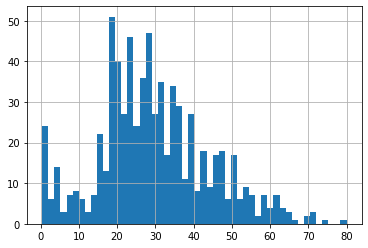

In [27]:
df.Age.hist(bins = 50)

In [31]:
extreme = df.Age.mean() + 3 * df.Age.std()

C:\Users\rbhar\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


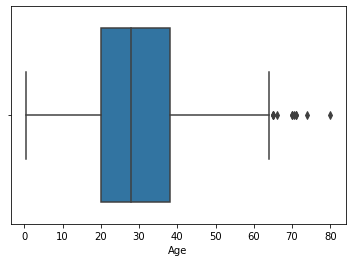

In [30]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [32]:
def impute_nan(df, variable, median, extreme):
    df[variable +'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [33]:
impute_nan(df, 'Age', df.Age.median(), extreme)

In [34]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


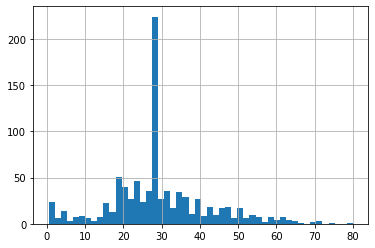

In [35]:
df['Age'].hist(bins = 50)

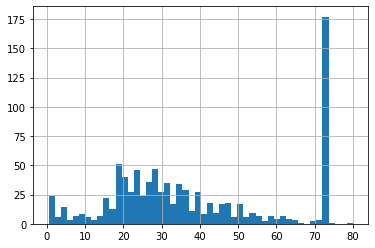

In [36]:
df['Age_end_distribution'].hist(bins = 50)

C:\Users\rbhar\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


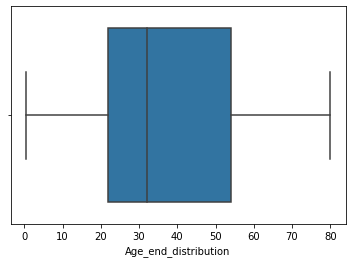

In [37]:
sns.boxplot('Age_end_distribution', data = df)

#### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

#### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering